In [1]:


import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 



In [2]:


ru_fix_demo = pd.read_csv("../Datasets/DataToUse/du_fix_demo.csv", )
print(ru_fix_demo.shape)
ru_fix_demo.head()


(92937, 21)


,Text_ID,Fix_X,Fix_Y,Fix_Duration,Word_Number,Word,Sentence,Language,SubjectID,L2_spelling_skill,...,vocab.t2.5,L2_lexical_skill,TOWRE_word,TOWRE_nonword,motiv,IQ,Age,Sex,Target_Ave,Target_Label
0,1,103,123,48,1,Samuel,"Samuel Morse, best k",du,du_4,3.522727,...,4.625,3.75,4.038462,4.444444,3.8,6.0,19,0,3.946772,4.0
1,1,366,152,96,3,best,"Samuel Morse, best k",du,du_4,3.522727,...,4.625,3.75,4.038462,4.444444,3.8,6.0,19,0,3.946772,4.0
2,1,250,135,117,2,"Morse,","Samuel Morse, best k",du,du_4,3.522727,...,4.625,3.75,4.038462,4.444444,3.8,6.0,19,0,3.946772,4.0
3,1,175,123,264,1,Samuel,"Samuel Morse, best k",du,du_4,3.522727,...,4.625,3.75,4.038462,4.444444,3.8,6.0,19,0,3.946772,4.0
4,1,226,119,155,2,"Morse,","Samuel Morse, best k",du,du_4,3.522727,...,4.625,3.75,4.038462,4.444444,3.8,6.0,19,0,3.946772,4.0


In [3]:


ru_fix_demo.columns



Index(['Text_ID', 'Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number', 'Word',
       'Sentence', 'Language', 'SubjectID', 'L2_spelling_skill',
       'L2_vocabulary_size', 'vocab.t2.5', 'L2_lexical_skill', 'TOWRE_word',
       'TOWRE_nonword', 'motiv', 'IQ', 'Age', 'Sex', 'Target_Ave',
       'Target_Label'],
      dtype='object')

In [4]:

subject_ids = ru_fix_demo.SubjectID.unique()
print(subject_ids, len(subject_ids))



['du_4' 'du_5' 'du_6' 'du_7' 'du_8' 'du_10' 'du_11' 'du_12' 'du_13'
 'du_14' 'du_18' 'du_19' 'du_20' 'du_21' 'du_22' 'du_23' 'du_24' 'du_25'
 'du_27' 'du_28' 'du_29' 'du_30' 'du_31' 'du_32' 'du_33' 'du_34' 'du_35'
 'du_36' 'du_37' 'du_38' 'du_40' 'du_41' 'du_42' 'du_43' 'du_44' 'du_45'
 'du_46' 'du_47' 'du_48' 'du_49' 'du_50' 'du_51' 'du_53' 'du_54' 'du_55'
 'du_56' 'du_57'] 47


In [5]:

targets = ["Target_Label"]
indicator = ["SubjectID"]
features = ['Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number','motiv', 'IQ', 'Age', 'Sex',]
features



['Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number', 'motiv', 'IQ', 'Age', 'Sex']

In [6]:


data = ru_fix_demo[indicator+features+targets]
data



,SubjectID,Fix_X,Fix_Y,Fix_Duration,Word_Number,motiv,IQ,Age,Sex,Target_Label
0,du_4,103,123,48,1,3.8,6.0,19,0,4.0
1,du_4,366,152,96,3,3.8,6.0,19,0,4.0
2,du_4,250,135,117,2,3.8,6.0,19,0,4.0
3,du_4,175,123,264,1,3.8,6.0,19,0,4.0
4,du_4,226,119,155,2,3.8,6.0,19,0,4.0
...,...,...,...,...,...,...,...,...,...,...
92932,du_57,368,544,152,147,4.0,10.0,25,0,4.0
92933,du_57,482,547,112,147,4.0,10.0,25,0,4.0
92934,du_57,238,542,156,145,4.0,10.0,25,0,4.0
92935,du_57,395,536,142,147,4.0,10.0,25,0,4.0


In [7]:

correlations = data[features+targets].corr()
correlations



,Fix_X,Fix_Y,Fix_Duration,Word_Number,motiv,IQ,Age,Sex,Target_Label
Fix_X,1.000000,-0.038063,0.007178,0.074930,-0.010713,-0.014436,0.015267,0.001440,-0.003180
Fix_Y,-0.038063,1.000000,-0.010217,0.970558,0.042724,-0.021295,-0.012914,-0.006416,0.011220
Fix_Duration,0.007178,-0.010217,1.000000,-0.014079,-0.045489,0.004405,-0.005579,0.036355,-0.059563
Word_Number,0.074930,0.970558,-0.014079,1.000000,0.038749,-0.016582,-0.010364,-0.001856,0.008750
motiv,-0.010713,0.042724,-0.045489,0.038749,1.000000,0.045373,-0.111246,-0.268977,0.072150
IQ,-0.014436,-0.021295,0.004405,-0.016582,0.045373,1.000000,0.013849,0.082758,0.114686
Age,0.015267,-0.012914,-0.005579,-0.010364,-0.111246,0.013849,1.000000,0.321664,0.069998
Sex,0.001440,-0.006416,0.036355,-0.001856,-0.268977,0.082758,0.321664,1.000000,-0.027872
Target_Label,-0.003180,0.011220,-0.059563,0.008750,0.072150,0.114686,0.069998,-0.027872,1.000000


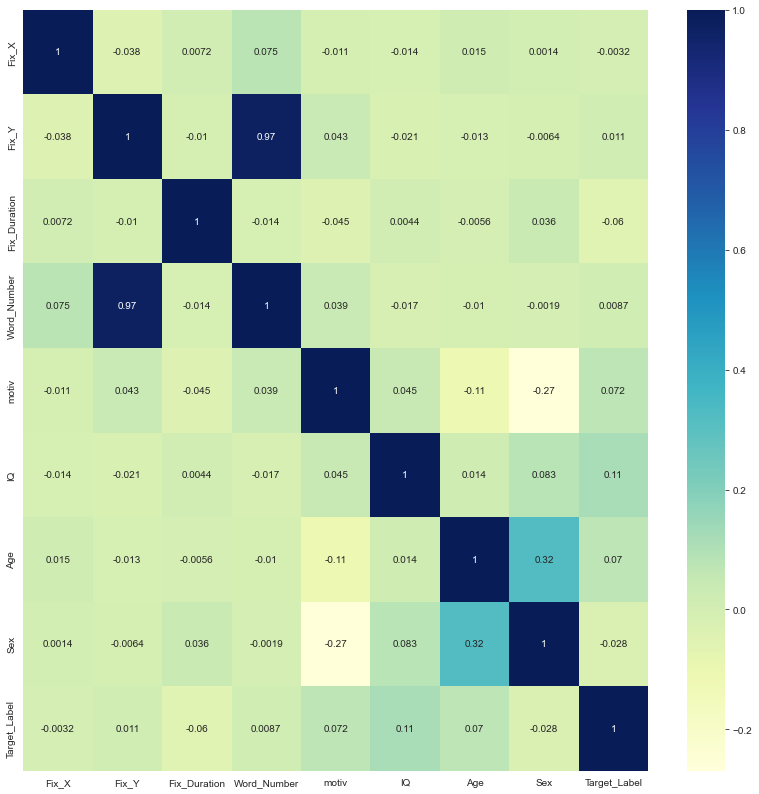

In [8]:

fig = plt.figure(figsize=(14, 14),)
sns.heatmap(
    data=correlations,
    xticklabels=correlations.columns,
    yticklabels=correlations.columns,
    cmap="YlGnBu",
    annot=True
)
plt.show()




- Significant correlations between:

    - Fix_Y and Word_Number
    - Age and Motiv
    




In [9]:

ages, motives, iqs = [], [], []
cefr = []
for subject_id in subject_ids:
    ages.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].Age)
    motives.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].motiv)
    iqs.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].IQ)
    cefr.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].Target_Label)
    

ages = np.asarray(ages)
motives = np.asarray(motives)
iqs = np.asarray(iqs)
cefr = np.asarray(cefr)

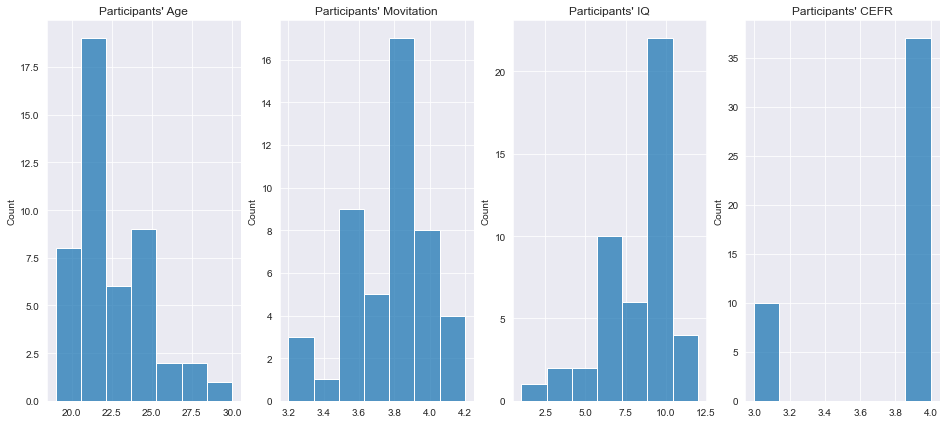

In [10]:

plt.figure(figsize=(16, 7))
plt.subplot(141)
sns.histplot(ages)
plt.title("Participants' Age")
plt.subplot(142)
sns.histplot(motives)
plt.title("Participants' Movitation")
plt.subplot(143)
sns.histplot(iqs)
plt.title("Participants' IQ")
plt.subplot(144)
sns.histplot(cefr)
plt.title("Participants' CEFR")
plt.show()



In [11]:

labels = data.Target_Label.unique()
labels


array([4., 3.])

- The discrete target values are: **A1=0, A2=1, B1=2, B2=3, C1=4, C2=5** (CEFR level)

In [12]:

# seperating levels and gender (assuming that 1 represents being male?)

# A1 
a1 = data.loc[(data.Target_Label == 0.)]
a1_male = data.loc[(data.Target_Label == 0.) & (data.Sex == 1)]
a1_female = data.loc[(data.Target_Label == 0.) & (data.Sex == 0)]

# A2 
a2 = data.loc[(data.Target_Label == 1.)]
a2_male = data.loc[(data.Target_Label == 1.) & (data.Sex == 1)]
a2_female = data.loc[(data.Target_Label == 1.) & (data.Sex == 0)]

# B1
b1 = data.loc[(data.Target_Label == 2.)]
b1_male = data.loc[(data.Target_Label == 2.) & (data.Sex == 1)]
b1_female = data.loc[(data.Target_Label == 2.) & (data.Sex == 0)]

# B2
b2 = data.loc[(data.Target_Label == 3.)]
b2_male = data.loc[(data.Target_Label == 3.) & (data.Sex == 1)]
b2_female = data.loc[(data.Target_Label == 3.) & (data.Sex == 0)]


# C1
c1 = data.loc[(data.Target_Label == 4.)]
c1_male = data.loc[(data.Target_Label == 4.) & (data.Sex == 1)]
c1_female = data.loc[(data.Target_Label == 4.) & (data.Sex == 0)]


# C2
c2 = data.loc[(data.Target_Label == 5.)]
c2_male = data.loc[(data.Target_Label == 5.) & (data.Sex == 1)]
c2_female = data.loc[(data.Target_Label == 5.) & (data.Sex == 0)]




In [13]:



print("Participants Info: \n \n"
      f" A1 {a1.SubjectID.unique().shape[0]} :" 
      f" Male:{a1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{a1_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" A2 {a2.SubjectID.unique().shape[0]} :" 
      f" Male:{a2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{a2_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" B1 {b1.SubjectID.unique().shape[0]} :" 
      f" Male:{b1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{b1_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" B2 {b2.SubjectID.unique().shape[0]}:" 
      f" Male:{b2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{b2_female.SubjectID.unique().shape[0]} \n \n"   
      
      
      f" C1 {c1.SubjectID.unique().shape[0]}:" 
      f" Male:{c1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{c1_female.SubjectID.unique().shape[0]} \n \n"    
      
      
      f" C2 {c2.SubjectID.unique().shape[0]}:" 
      f" Male:{c2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{c2_female.SubjectID.unique().shape[0]} \n \n"    
     )




Participants Info: 
 
 A1 0 : Male:0 &  Female:0 
 
 A2 0 : Male:0 &  Female:0 
 
 B1 0 : Male:0 &  Female:0 
 
 B2 10: Male:2 &  Female:8 
 
 C1 37: Male:7 &  Female:30 
 
 C2 0: Male:0 &  Female:0 
 



## Let us plot THE KDSs and dive in more details


In [14]:
b1.Fix_X.values

array([], dtype=int64)

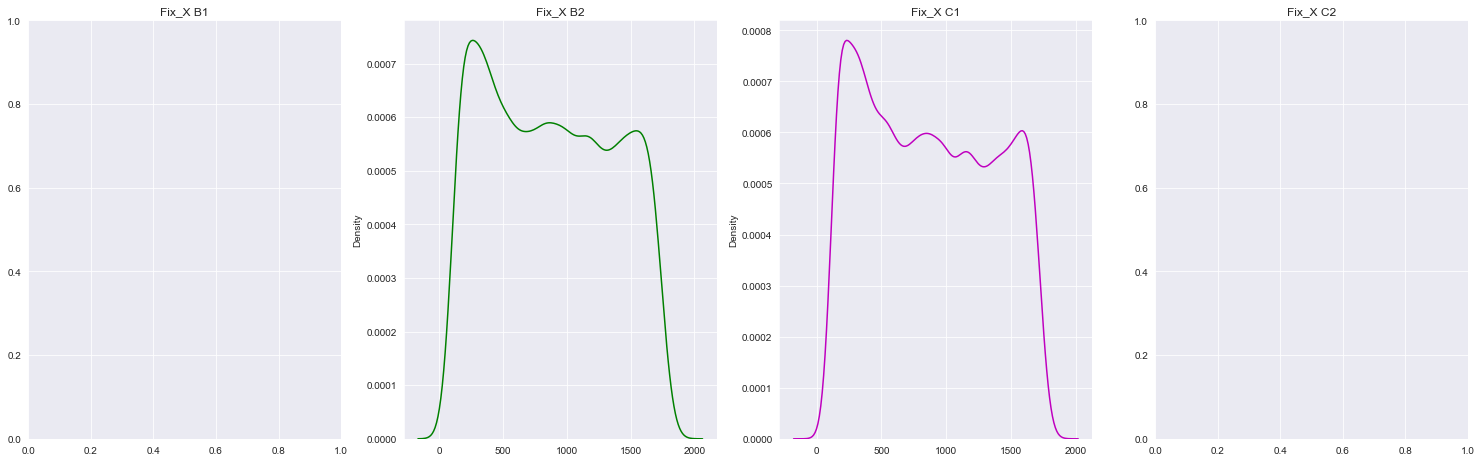

In [15]:


fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )


# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_X.values, color='b')
ax.set_title("Fix_X B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_X.values, color='g')
ax.set_title("Fix_X B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_X.values, color='m')
ax.set_title("Fix_X C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_X.values, color='k')
ax.set_title("Fix_X C2")

plt.show()

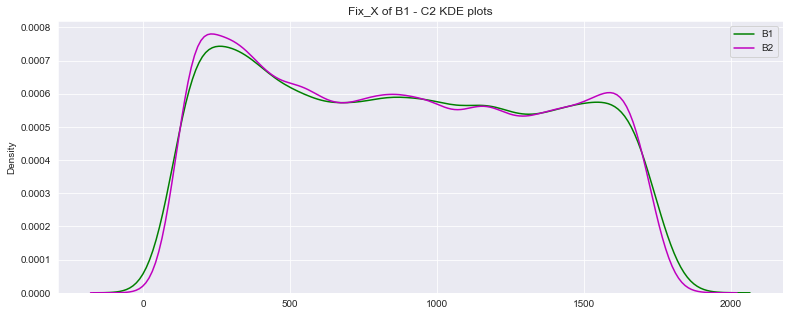

In [16]:


plt.figure(figsize=(13, 5))
plt.title("Fix_X of B1 - C2 KDE plots")
sns.kdeplot(b1.Fix_X.values, color='b')
sns.kdeplot(b2.Fix_X.values, color='g')
sns.kdeplot(c1.Fix_X.values, color='m')
sns.kdeplot(c2.Fix_X.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()



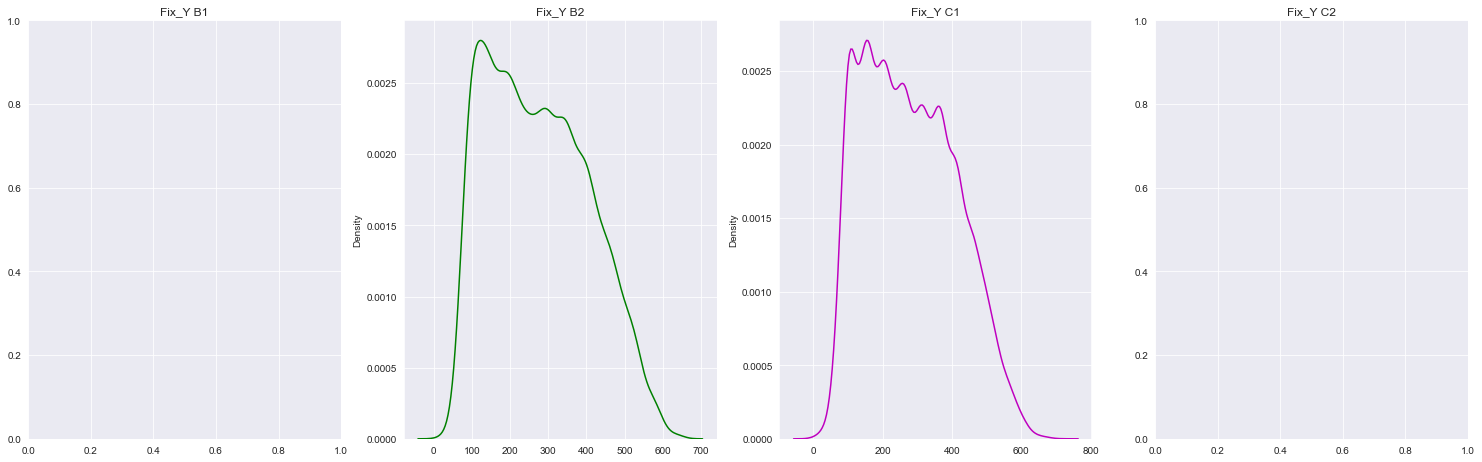

In [17]:


fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )



# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_Y.values, color='b')
ax.set_title("Fix_Y B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_Y.values, color='g')
ax.set_title("Fix_Y B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_Y.values, color='m')
ax.set_title("Fix_Y C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_Y.values, color='k')
ax.set_title("Fix_Y C2")

plt.show()



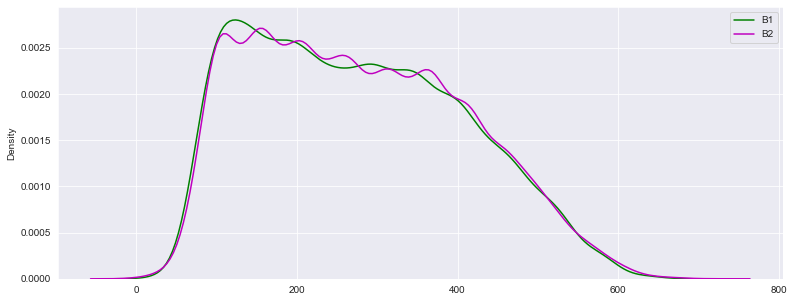

In [18]:


plt.figure(figsize=(13, 5))
sns.kdeplot(b1.Fix_Y.values, color='b')
sns.kdeplot(b2.Fix_Y.values, color='g')
sns.kdeplot(c1.Fix_Y.values, color='m')
sns.kdeplot(c2.Fix_Y.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()


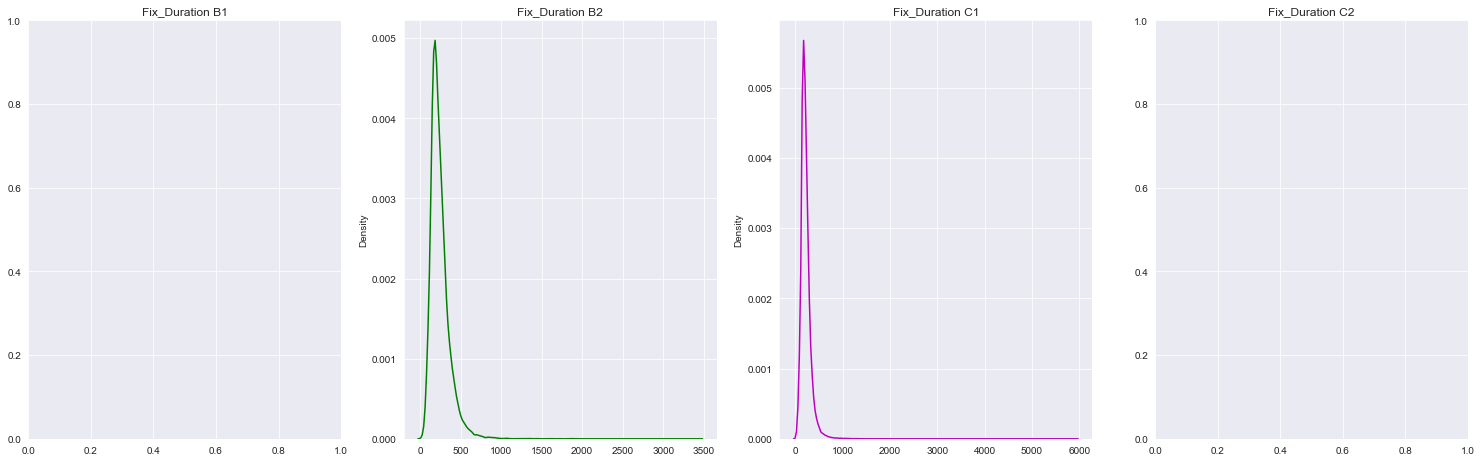

In [19]:




fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )


# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_Duration.values, color='b')
ax.set_title("Fix_Duration B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_Duration.values, color='g')
ax.set_title("Fix_Duration B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_Duration.values, color='m')
ax.set_title("Fix_Duration C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_Duration.values, color='k')
ax.set_title("Fix_Duration C2")

plt.show()



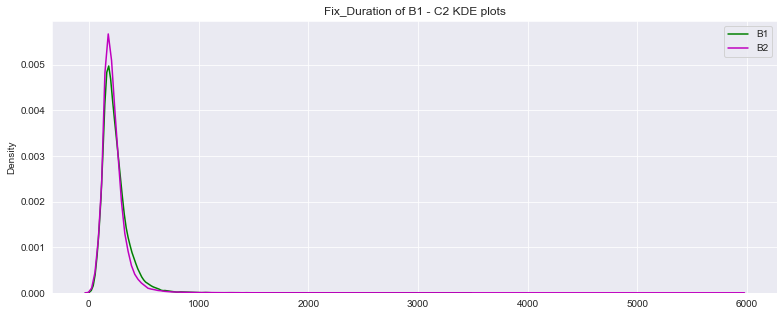

In [20]:




plt.figure(figsize=(13, 5))
plt.title("Fix_Duration of B1 - C2 KDE plots")
sns.kdeplot(b1.Fix_Duration.values, color='b')
sns.kdeplot(b2.Fix_Duration.values, color='g')
sns.kdeplot(c1.Fix_Duration.values, color='m')
sns.kdeplot(c2.Fix_Duration.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()
 

## Momentums

In [21]:


b1_male[["Fix_X", "Fix_Y", "Fix_Duration"]]

,Fix_X,Fix_Y,Fix_Duration


In [22]:


print("Target values 1st Momentum: \n \n"
      
      "Fix.      x-axis            y-axis            durarion \n"
    
      f" B1 {b1.SubjectID.unique().shape[0]} :" 
      f" {b1.Fix_X.mean():.3f}±{b1.Fix_X.std():.3f}  "
      f" {b1.Fix_Y.mean():.3f}±{b1.Fix_Y.std():.3f}  "
      f" {b1.Fix_Duration.mean():.3f}±{b1.Fix_Duration.std():.3f} \n"
      
      f" B2 {b2.SubjectID.unique().shape[0]}:" 
      f" {b2.Fix_X.mean():.3f}±{b2.Fix_X.std():.3f}  "
      f" {b2.Fix_Y.mean():.3f}±{b2.Fix_Y.std():.3f}  "
      f" {b2.Fix_Duration.mean():.3f}±{b2.Fix_Duration.std():.3f} \n"
      
      
      f" C1 {c1.SubjectID.unique().shape[0]}:" 
      f" {c1.Fix_X.mean():.3f}±{c1.Fix_X.std():.3f}  "
      f" {c1.Fix_Y.mean():.3f}±{c1.Fix_Y.std():.3f}  "
      f" {c1.Fix_Duration.mean():.3f}±{c1.Fix_Duration.std():.3f} \n"
    
      
      f" C2 {c2.SubjectID.unique().shape[0]} :" 
      f" {c2.Fix_X.mean():.3f}±{c2.Fix_X.std():.3f}  "
      f" {c2.Fix_Y.mean():.3f}±{c2.Fix_Y.std():.3f}  "
      f" {c2.Fix_Duration.mean():.3f}±{c2.Fix_Duration.std():.3f} \n"
      
      
     )

Target values 1st Momentum: 
 
Fix.      x-axis            y-axis            durarion 
 B1 0 : nan±nan   nan±nan   nan±nan 
 B2 10: 879.840±487.517   274.547±131.308   239.858±121.272 
 C1 37: 876.091±483.941   278.145±132.011   222.962±115.060 
 C2 0 : nan±nan   nan±nan   nan±nan 



In [23]:

b1_male.Fix_X.std()

nan